In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pylab as plt
import cv2
import keras
import keras.utils.np_utils
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.datasets import mnist
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.preprocessing import image

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [6]:
model = Sequential()

model.add(Conv2D(8, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 16)          0         
                                                                 
 flatten (Flatten)           (None, 400)               0

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

In [8]:
model.fit(x_train, y_train, batch_size = 128, epochs = 2, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/2
469/469 [==============================] - 11s 22ms/step - loss: 0.8400 - accuracy: 0.7283 - val_loss: 0.1599 - val_accuracy: 0.9540
Epoch 2/2
469/469 [==============================] - 10s 22ms/step - loss: 0.3795 - accuracy: 0.8819 - val_loss: 0.1034 - val_accuracy: 0.9687


In [9]:
score = model.evaluate(x_test, y_test, verbose = 0)

In [10]:
print('Accuracy : ', score[1])
print('Loss : ', score[0])

Accuracy :  0.9686999917030334
Loss :  0.10344326496124268


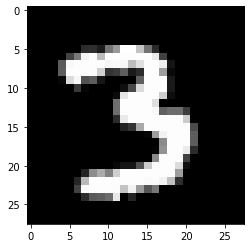

In [11]:
plt.imshow(x_test[500], cmap='gray')

In [12]:
prediction = model.predict(x_test[500:501])

thresholded = (prediction>0.5)*1
print('Thresholded score :',thresholded[0])
print('Predicted Digit : ',np.where(thresholded == 1)[1][0])

Thresholded score : [0 0 0 1 0 0 0 0 0 0]
Predicted Digit :  3
